In [1]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from attrbench.evaluation import result
from attrbench.plot import lineplot
from os import path
import os
import pickle as pkl
mpl.rcParams['figure.dpi'] = 150

## Load and plot experiment data

Gradient: [0.24 - 0.24 - 0.25]
SmoothGrad: [0.25 - 0.25 - 0.26]
InputXGradient: [0.64 - 0.64 - 0.65]
IntegratedGradients: [0.65 - 0.66 - 0.66]
GuidedBackprop: [0.37 - 0.37 - 0.38]
Deconvolution: [0.37 - 0.37 - 0.38]
Ablation: [0.67 - 0.68 - 0.68]
GuidedGradCAM: [0.37 - 0.38 - 0.38]
GradCAM: [0.21 - 0.21 - 0.22]


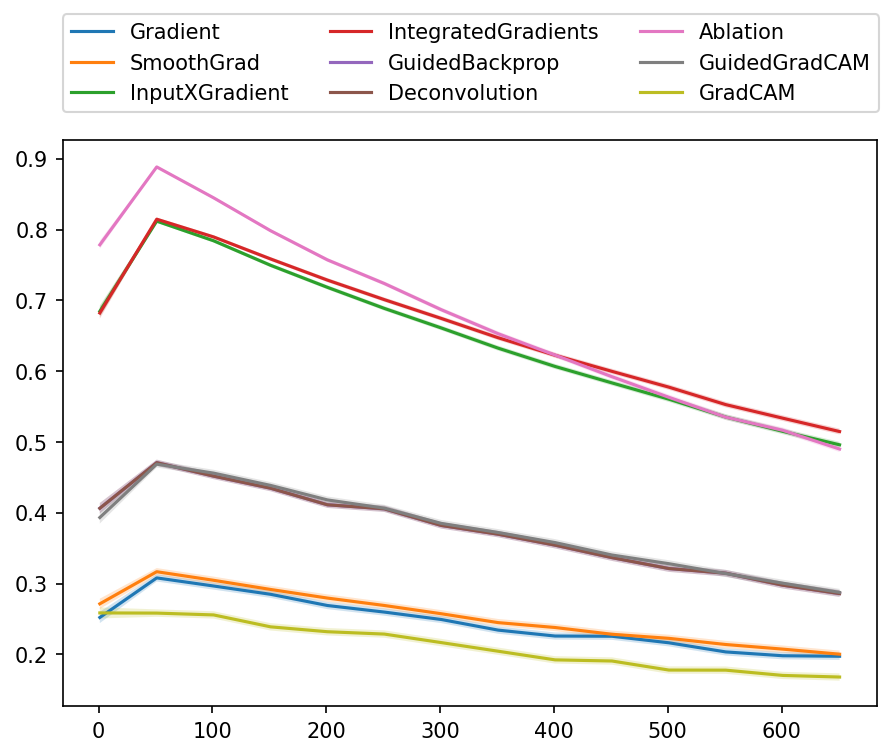

In [4]:
data = pkl.load(open("../out/mnist/sensitivity_n/result_new.pkl", "rb"))
res = result.LinePlotResult(data)
fig, ax = res.plot(ci=True)
auc = res.auc()
for method in auc:
    print(f"{method}: [{auc[method]['lower']:.2f} - {auc[method]['mean']:.2f} - {auc[method]['upper']:.2f}]")

## Plot using old code

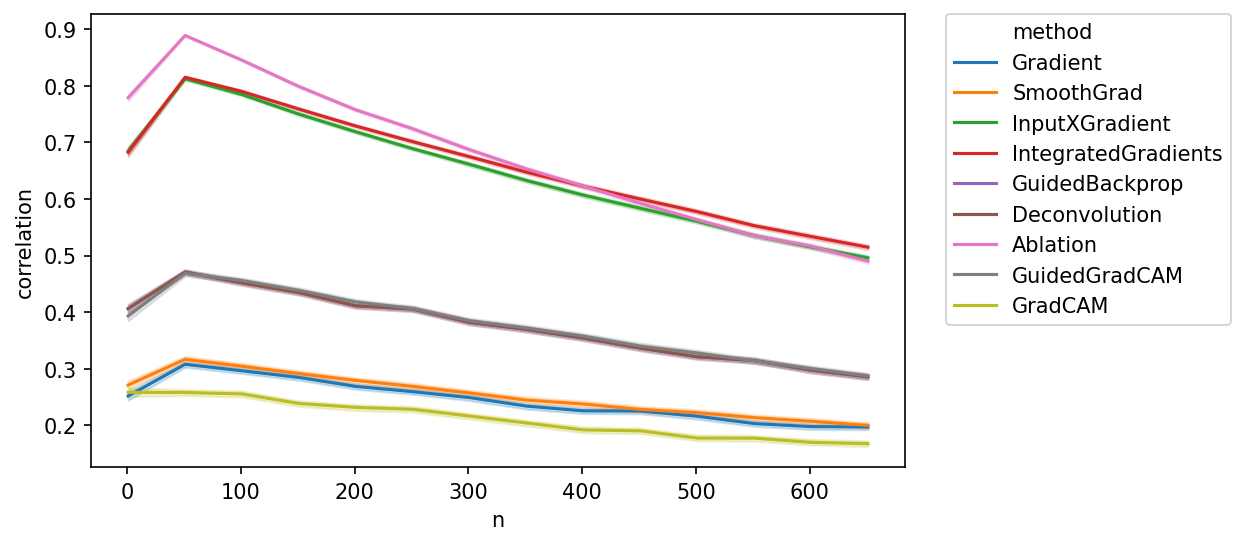

In [27]:
lineplot("../out/mnist/sensitivity_n/", x="n", y="correlation")

## Convert experiment results (deletion/insertion curves)

In [12]:
def convert_result(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["insertion"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["difference"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [ ]:
res_dir = "../out/imagenette/insertion_curves"
convert_result(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))

## Convert experiment results (sensitivity-n)

In [12]:
#def convert_result_sens_n(in_filename, out_filename):
res_dir = "../out/imagenette/sensitivity_n"
in_filename = path.join(res_dir, "result.pkl")
df = pkl.load(open(in_filename, "rb"))

In [13]:
df

,sample,n,method,correlation
0,0,1,SmoothGrad,-0.179504
1,0,1,IntegratedGradients,-0.024632
2,0,501,SmoothGrad,-0.027357
3,0,501,IntegratedGradients,0.272074
4,0,1001,SmoothGrad,0.074383
...,...,...,...,...
470995,3924,9501,InputXGradient,0.071119
470996,3924,9501,GuidedBackprop,0.099337
470997,3924,9501,Deconvolution,-0.016700
470998,3924,9501,GuidedGradCAM,0.079232


In [14]:
def convert_result_sens_n(in_filename, out_filename):
    df = pkl.load(open(in_filename, "rb"))
    x_range = df["n"].unique()
    methods = df["method"].unique()
    raw = {}
    for method in methods:
        raw[method] = df[df["method"] == method][["correlation"]].values.reshape((-1, len(x_range)))
    result = {
        "data": raw,
        "x_range": x_range
    }
    pkl.dump(result, open(out_filename, "wb"))

In [21]:
res_dir = "../out/cifar10_old/sensitivity_n"
convert_result_sens_n(path.join(res_dir, "result.pkl"), path.join(res_dir, "result_new.pkl"))

EOFError: Ran out of input